# Table of contents
1. [Data Preparation](#dprep)
2. [Exploratory Data Analysis](#expda)
3. [Research Design](#rsdgn)
4. [Modeling](#model)
5. [Evaluation](#eval)

## 1. Data Preparation <a name="dprep"></a>

In [62]:
# Proses melakukan import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler 

In [63]:
# Proses melakukan import dataset yang diperlukan
test_set = pd.read_csv('dataset/test_set_features.csv')
features = pd.read_csv('dataset/training_set_features.csv')
labels = pd.read_csv('dataset/training_set_labels.csv')

## 2. Exploratory Data Analysis <a name="expda"></a>

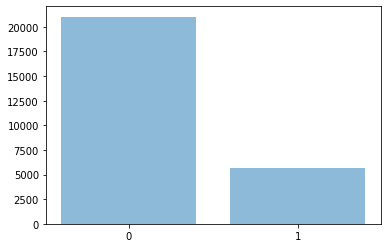

In [64]:
# Menampilkan perbandingan distribusi nilai 0 dan 1 pada h1n1 vaccine di labels
h1n1_vacc_dist = labels.groupby('h1n1_vaccine').size()
plt.bar(['0','1'],h1n1_vacc_dist, align='center', alpha=0.5)
plt.show()

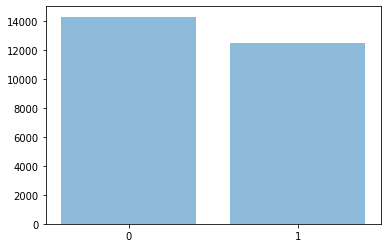

In [65]:
# Menampilkan perbandingan distribusi nilai 0 dan 1 pada seasonal vaccine di labels
seasonal_vacc_dist = labels.groupby('seasonal_vaccine').size()
plt.bar(['0','1'],seasonal_vacc_dist, align='center', alpha=0.5)
plt.show()

## 3. Research Design <a name="rsdgn"></a>

### Research Design Table of contents
1. [Data Cleaning](#dclean) <br>
2. [Feature Engineering](#fe) <br>

## 1. Data Cleaning <a name="dclean"></a>

In [66]:
# Menampilkan jumlah missing value pada features
na_feature = features.isna().sum()
na_feature

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [67]:
# Menampilkan jumlah missing value pada test set
na_test_set = test_set.isna().sum()
na_test_set

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [68]:
# Proses mengisi missing value numerical pada features dengan mean dari seluruh data kolom tersebut
features = features.fillna(features.mean(numeric_only= True))
features = round(features)

# Proses mengisi missing values string pada features dengan 'NULL'
features = features.fillna('NULL')

In [70]:
# Proses mengisi missing value numerical pada test set dengan mean dari seluruh data kolom tersebut
test_set = test_set.fillna(test_set.mean(numeric_only= True))
test_set = round(test_set)

# Proses mengisi missing values string pada test set dengan 'NULL'

test_set = test_set.fillna('NULL')

## 2. Feature Engineering <a name="fe"></a>

In [71]:
# Membuat encoder
enc = LabelEncoder()

In [72]:
# Proses melakukan encoding terhadap attribute yang bukan numerical
# Proses encoding age group
features.age_group = enc.fit_transform(features.age_group)
test_set.age_group = enc.transform(test_set.age_group)

# Proses encoding education
features.education = enc.fit_transform(features.education)
test_set.education = enc.fit_transform(test_set.education)

# Proses encoding race
features.race = enc.fit_transform(features.race)
test_set.race = enc.fit_transform(test_set.race)

# Proses encoding sex
features.sex = enc.fit_transform(features.sex)
test_set.sex = enc.fit_transform(test_set.sex)

# Proses encoding income poverty
features.income_poverty = enc.fit_transform(features.income_poverty)
test_set.income_poverty = enc.fit_transform(test_set.income_poverty)


# Proses encoding marital status
features.marital_status = enc.fit_transform(features.marital_status)
test_set.marital_status = enc.fit_transform(test_set.marital_status)


# Proses encoding rent or own
features.rent_or_own = enc.fit_transform(features.rent_or_own)
test_set.rent_or_own = enc.fit_transform(test_set.rent_or_own)

# Proses encoding employment status
features.employment_status = enc.fit_transform(features.employment_status)
test_set.employment_status = enc.fit_transform(test_set.employment_status)


# Proses encoding hhs geo region
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
test_set.hhs_geo_region = enc.fit_transform(test_set.hhs_geo_region)


# Proses encoding census msa
features.census_msa = enc.fit_transform(features.census_msa)
test_set.census_msa = enc.fit_transform(test_set.census_msa)


# Proses encoding employment industry
features.employment_industry = enc.fit_transform(features.employment_industry)
test_set.employment_industry = enc.fit_transform(test_set.employment_industry)


# Proses encoding employment occupation
features.employment_occupation = enc.fit_transform(features.employment_occupation)
test_set.employment_occupation = enc.fit_transform(test_set.employment_occupation)

In [73]:
# Menampilkan jumlah missing value pada features setelah dilakukan encoding
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [74]:
# Menampilkan jumlah missing value pada test set setelah dilakukan encoding
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26708 non-null  float64
 2   h1n1_knowledge               26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_h1n1             26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [75]:
# Proses dropping respondent id agar tidak berpengaruh pada model
labels = labels.drop(columns=['respondent_id'])
labels

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [76]:
# Proses pemisahan label h1n1 dan seasonal
# Proses pembuatan dataframe labels h1n1
labels_h1n1 = pd.DataFrame()
labels_h1n1['labels'] = labels['h1n1_vaccine']

# Proses pembuatan dataframe labels h1n1
labels_seasonal = pd.DataFrame()
labels_seasonal['labels'] = labels['seasonal_vaccine']


C:\Users\faris\AppData\Local\Temp\ipykernel_41600\3935822197.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features,labels_h1n1)


[0.04228322 0.03122034 0.02495827 0.00858483 0.01756627 0.01005954
 0.0117501  0.0180557  0.01811836 0.01781515 0.11082286 0.02598826
 0.01771073 0.01125124 0.02103782 0.00652283 0.05437501 0.06709439
 0.03105819 0.02912932 0.03978883 0.02940055 0.03331731 0.02995959
 0.01990884 0.02045905 0.02789217 0.0191444  0.02028109 0.01699982
 0.03904303 0.03028078 0.02583333 0.02274973 0.02413868 0.02540037]


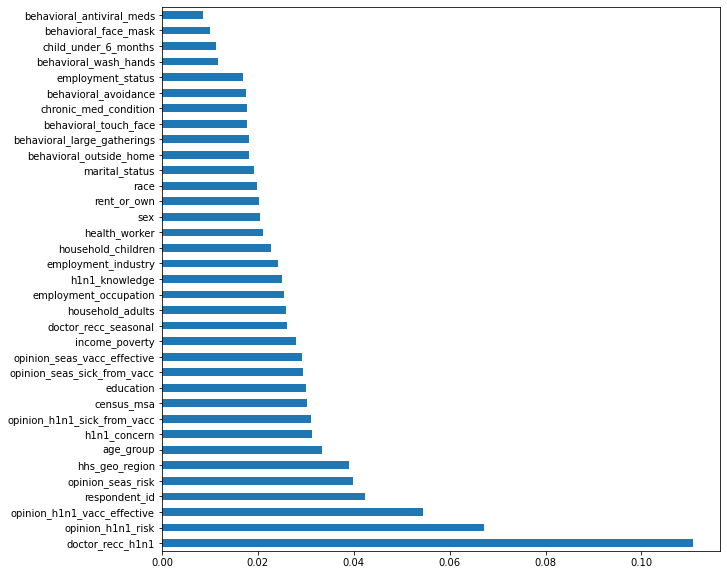

In [38]:
# Proses pencarian atribut mana yang berpengaruh besar pada penentuan h1n1 vaccine
model = ExtraTreesClassifier()
model.fit(features,labels_h1n1)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

C:\Users\kofif\AppData\Local\Temp\ipykernel_1784\688366837.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features,labels_seasonal)


[0.03769965 0.0287865  0.02532227 0.00712782 0.01652123 0.00855322
 0.01205743 0.01744152 0.01736771 0.01637272 0.01952274 0.0829671
 0.01836567 0.00941101 0.01528727 0.00868085 0.03187961 0.03400589
 0.02805162 0.07693373 0.09148922 0.03052315 0.06275165 0.02820788
 0.01984305 0.01968201 0.02566709 0.01874764 0.01904984 0.01608483
 0.03492189 0.02730804 0.02380555 0.02115885 0.0242261  0.02417766]


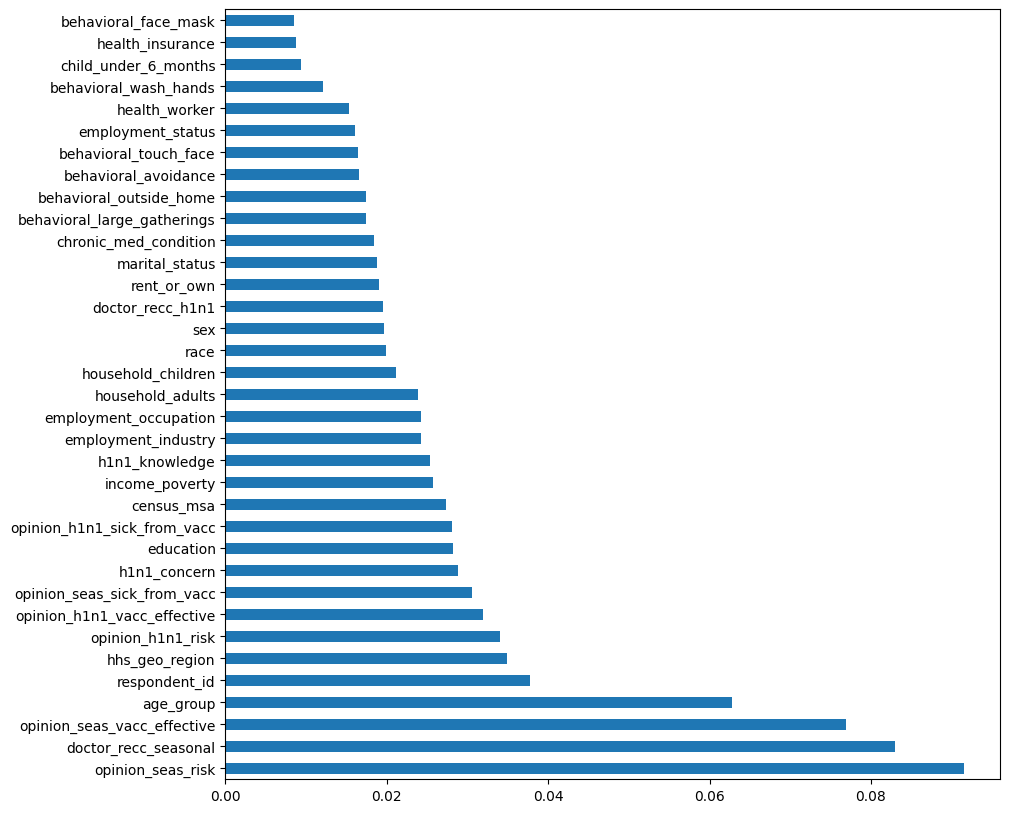

In [28]:
# Proses pencarian atribut mana yang berpengaruh besar pada penentuan seasonal vaccine
model = ExtraTreesClassifier()
model.fit(features,labels_seasonal)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [77]:
# Proses penghapusan atribut features yang tidak berpengaruh besar pada penentuan h1n1 vaccine
features_h1n1 = features.drop(columns=['doctor_recc_h1n1',
                                       'opinion_h1n1_risk',
                                       'opinion_h1n1_vacc_effective',
                                       'opinion_seas_risk',
                                         'respondent_id',
                                         'hhs_geo_region'])

# Proses penghapusan atribut test set yang tidak berpengaruh besar pada penentuan h1n1 vaccine
test_set_h1n1 = test_set.drop(columns=['doctor_recc_h1n1',
                                       'opinion_h1n1_risk',
                                       'opinion_h1n1_vacc_effective',
                                       'opinion_seas_risk',
                                         'respondent_id',
                                         'hhs_geo_region'])

# Proses penghapusan atribut features yang tidak berpengaruh besar pada penentuan seasonal vaccine
features_seasonal = features.drop(columns=['opinion_seas_risk',
                                           'doctor_recc_seasonal',
                                           'opinion_seas_vacc_effective',
                                           'age_group',
                                           ])

# Proses penghapusan atribut test set yang tidak berpengaruh besar pada penentuan seasonal vaccine
test_set_seasonal = test_set.drop(columns=['opinion_seas_risk',
                                           'doctor_recc_seasonal',
                                           'opinion_seas_vacc_effective',
                                           'age_group',
                                           ])

In [78]:
# Proses oversampling data agar distribusi nilai 0 dan 1 sama
oversample_h1n1 = RandomOverSampler(sampling_strategy='auto')
oversample_seasonal = RandomOverSampler(sampling_strategy='auto')

features_h1n1_ovsmpld, labels_h1n1_ovsmpld = oversample_h1n1.fit_resample(features_h1n1, labels_h1n1)
features_seasonal_ovsmpld, labels_seasonal_ovsmpld = oversample_h1n1.fit_resample(features_seasonal, labels_seasonal)

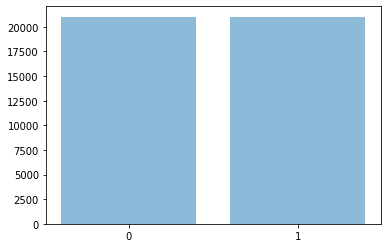

In [79]:
# Menampilkan perbandingan distribusi nilai 0 dan 1 pada h1n1 vaccine di labels setelah oversample
h1n1_vacc_dist_oversampled = labels_h1n1_ovsmpld.groupby('labels').size()
plt.bar(['0','1'],h1n1_vacc_dist_oversampled, align='center', alpha=0.5)
plt.show()

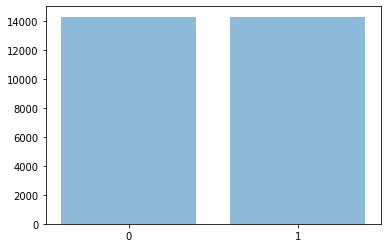

In [80]:
# Menampilkan perbandingan distribusi nilai 0 dan 1 pada h1n1 vaccine di labels setelah oversample
seasonal_vacc_dist_oversampled = labels_seasonal_ovsmpld.groupby('labels').size()
plt.bar(['0','1'],seasonal_vacc_dist_oversampled, align='center', alpha=0.5)
plt.show()

In [81]:
# Export CSV yang sudah dilakukan proses cleaning dan feature engineering 
features_h1n1_ovsmpld.to_csv('clean_dataset/cleaned_features_h1n1.csv', index = False)
labels_h1n1_ovsmpld.to_csv('clean_dataset/cleaned_labels_h1n1.csv', index = False)
test_set_h1n1.to_csv('clean_dataset/cleaned_test_set_h1n1.csv', index = False)

features_seasonal_ovsmpld.to_csv('clean_dataset/cleaned_features_seasonal.csv', index = False)
labels_seasonal_ovsmpld.to_csv('clean_dataset/cleaned_labels_seasonal.csv', index = False)
test_set_seasonal.to_csv('clean_dataset/cleaned_test_set_seasonal.csv', index = False)

## 4. Modelling <a name="model"></a>

In [82]:
# CHECKPOINT
# Proses melakukan import library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

from sklearn.neighbors import LocalOutlierFactor

In [83]:
# Proses melakukan import dataset yang diperlukan
features_h1n1_ovsmpld = pd.read_csv('clean_dataset/cleaned_features_h1n1.csv')
labels_h1n1_ovsmpld = pd.read_csv('clean_dataset/cleaned_labels_h1n1.csv')
test_set_h1n1 = pd.read_csv('clean_dataset/cleaned_test_set_h1n1.csv')

features_seasonal = pd.read_csv('clean_dataset/cleaned_features_seasonal.csv')
labels_seasonal = pd.read_csv('clean_dataset/cleaned_labels_seasonal.csv')
test_set_seasonal = pd.read_csv('clean_dataset/cleaned_test_set_seasonal.csv')

In [84]:
# Proses melakukan define variable x y untuk training
x_h1n1 = features_h1n1_ovsmpld
y_h1n1 = labels_h1n1_ovsmpld

x_seasonal = features_seasonal
y_seasonal = labels_seasonal

In [86]:
# Proses splitting data training dan testing
x_train_h1n1, x_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(x_h1n1,y_h1n1, test_size = 0.3, random_state = 23)
x_train_seas, x_test_seas, y_train_seas, y_test_seas = train_test_split(x_seasonal,y_seasonal, test_size = 0.3, random_state = 23)

In [87]:
# Proses pembuatan model untuk prediksi h1n1 vaccine
# Initializing
model_RF_h1n1 = RandomForestClassifier(verbose=2, n_estimators= 1000)

# Training
model_RF_h1n1.fit(x_train_h1n1,y_train_h1n1)

C:\Users\faris\AppData\Local\Temp\ipykernel_41600\3587080489.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_h1n1.fit(x_train_h1n1,y_train_h1n1)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   50.2s finished


RandomForestClassifier(n_estimators=1000, verbose=2)

In [88]:
# Proses pembuatan model untuk prediksi seasonal vaccine
# Initializing
model_RF_seasonal = RandomForestClassifier(verbose=2, n_estimators= 1000)

# Training
model_RF_seasonal.fit(x_train_seas,y_train_seas)

C:\Users\faris\AppData\Local\Temp\ipykernel_41600\1207355081.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF_seasonal.fit(x_train_seas,y_train_seas)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   38.4s finished


RandomForestClassifier(n_estimators=1000, verbose=2)

## 5. Evaluation <a name="eval"></a>

In [89]:
# Proses prediksi test h1n1 vaccine
y_pred_h1n1 = model_RF_h1n1.predict(x_test_h1n1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.2s finished


In [90]:
# Proses evaluasi h1n1 vaccine
y_true = y_test_h1n1
y_pred = y_pred_h1n1  


def check(true,pred)  :
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    Accuracy = (tn+tp) / (tn+fp+tp+fn)
    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)
    Specifity = tn/(tn+fp)  

    print("Accuracy    :", Accuracy, "\nPrecision   :", Precision, "\nRecall      :", Recall, "\nSpecifity   :", Specifity)

check(y_true,y_pred)

Accuracy    : 0.9172741679873218 
Precision   : 0.8900105469338556 
Recall      : 0.9495257997106574 
Specifity   : 0.8859196749492109


In [91]:
# Proses prediksi test seasonal vaccine
y_pred_seas = model_RF_seasonal.predict(x_test_seas)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


In [92]:
# Proses prediksi h1n1 vaccine
y_true = y_test_seas
y_pred = y_pred_seas  

check(y_true,y_pred)

Accuracy    : 0.724661373190098 
Precision   : 0.7323135755258127 
Recall      : 0.7122268712226871 
Specifity   : 0.7372125762552793


In [93]:
# Proses prediksi test set
result_h1n1 = model_RF_h1n1.predict(test_set_h1n1)
result_seasonal = model_RF_seasonal.predict(test_set_seasonal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.9s finished


In [94]:
# Proses penyesuaian hasil prediksi dengan format submisi

# Proses pengubahan array menjadi dataframe
df = pd.DataFrame(result_h1n1, columns=["h1n1_vaccine"])
df['seasonal_vaccine'] = result_seasonal

# Proses pengambilan respondent id original
test_set = pd.read_csv('dataset/test_set_features.csv')
test_set.loc[:,"respondent_id"]

# Proses pembuatan dataframe akhir 
df_respondent = test_set.respondent_id
df_respondent =  pd.DataFrame(df_respondent, columns=["respondent_id"])
df_respondent["h1n1_vaccine"]= df["h1n1_vaccine"] 
df_respondent["seasonal_vaccine"]= df["seasonal_vaccine"] 

# Proses export dataframe menjadi csv
df_respondent.to_csv("prediction/bismillah_6.csv", index=False) 